In [24]:
import numpy as np
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [29]:
def band(nkl,kpoints,ham):
    '''
    :param k: wave number
    '''
    nk=32
    # Define the position of the original lattice
    #klines=np.zeros((nkl-1,nk))
    n=0
    d=np.size(ham([0.0,0.0]),1)
    evk=np.zeros((nk*nkl-nk-1,d))
    lenk=np.zeros((nk*nkl-nk-1,d))
    for i in range(0,nkl-1):
        print(i)
        klines=np.linspace(kpoints[i],kpoints[i+1],nk)

        for j in range(0,nk):
            mat=0
            k=klines[j]
            mat=ham(k)
            n=i*nk+j
            evk[n-1]=np.real(np.linalg.eigvalsh(mat))
            lenk[n-1]=n
    plt.plot(lenk,evk)
    

# Band structure of various 2D lattices

## Introduction
 In this notebook we introduce the calculation of 2D band structures, including square, triangular, ;ieb and honeycomb lattices.  
 

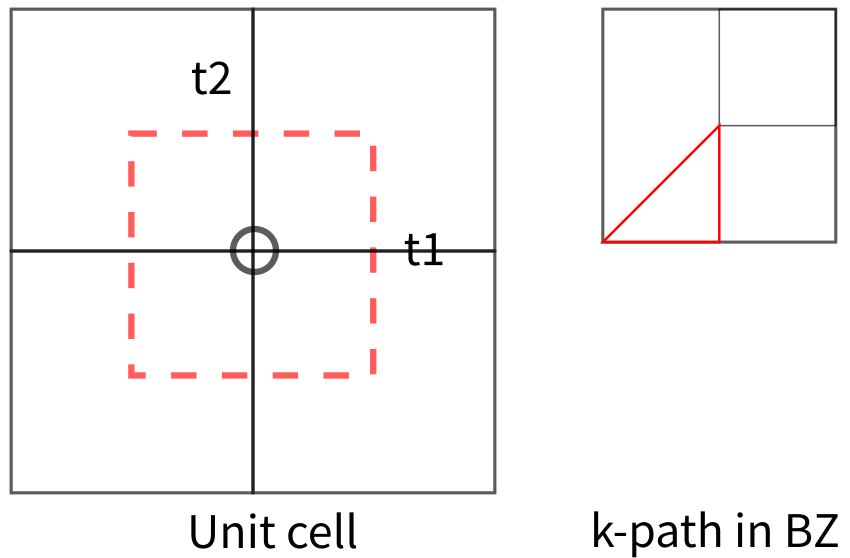

## The Square lattice
In analog of 1D chains, we write the Hamiltonian of 2D square lattice:
$$ H(k)=t_1  \exp(ik_x)+t_1  \exp(-ik_x)+t_2  \exp(ik_y)+t_2  \exp(-ik_y)$$
### Analytical solution
$$E(k)=2t_1\cos(k_x)+2t_2\cos(k_2)$$

In [30]:
def interactive_band_square(t1,t2):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.50,0.50]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: square_2d(k,t1,t2)
    band(nkl,kpoints,ham1)
def square_2d(kd,t1,t2):
    ham=np.zeros((1,1))+1.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][0]=2*t1*np.cos(k1)+2*t2*np.cos(k2)
    #ham[1][1]=0.0
    return(ham)
interactive(interactive_band_square, t1=(1.,4.), t2=(1., 4.))

interactive(children=(FloatSlider(value=2.5, description='t1', max=4.0, min=1.0), FloatSlider(value=2.5, descr…

## Honeycomb lattice

The honeycomb lattice is generated by two dublattices A and B. The Hamiltonian matrix is then $2 \times 2$:
$$H(k)=\left(\begin{array}{cc}
0 & t( \exp(ik\cdot \delta_1)+\exp(ik\cdot \delta_2)+\exp(ik\cdot \delta_3))\\
t(\exp(-ik\cdot \delta_1)+\exp(-ik\cdot \delta_2)+\exp(-ik\cdot \delta_3)) & 0
\end{array}\right)$$
Where $\delta_i$ are nearest-neighbour  bonds.

Since it is just a 2-dimension matrix, one can still solve it analytically:
$$E(k)=\pm \sqrt{3 + 2 \cos(k\cdot\delta_1) + 2 \cos(k\cdot\delta_2) + 2 \cos(k\cdot\delta_3)}$$

In [35]:
def interactive_band_honeycomb(t1,t2,t3):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.33,0.66]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: honeycomb_2d(k,t1,t2,t3)
    band(nkl,kpoints,ham1)
def honeycomb_2d(kd,t1,t2,t3):
    ham=np.zeros((2,2))+1.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][1]=np.exp(k1*1.j)*t2+np.exp(k2*1.j)*t3+t1
    ham[1][0]=np.exp(-k1*1.j)*t2+np.exp(-k2*1.j)*t3+t1
    ham[1][1]=0.0
    return(ham)
interactive(interactive_band_honeycomb, t1=(1.,4.), t2=(1., 4.),t3=(1.,4.))

interactive(children=(FloatSlider(value=2.5, description='t1', max=4.0, min=1.0), FloatSlider(value=2.5, descr…

## Triangular lattice

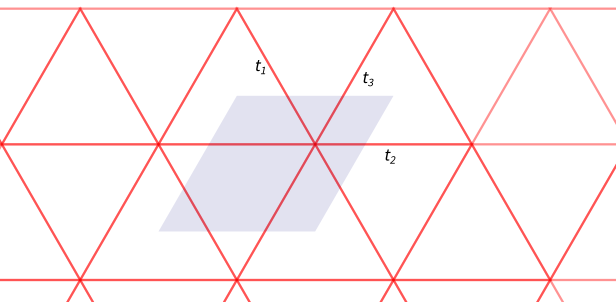  
The band structure of triangular lattice is governed by three parameters for hoppings.

In [32]:
def interactive_band_triangular(t1,t2,t3):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.33,0.66]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: triangular_2d(k,t1,t2,t3)
    band(nkl,kpoints,ham1)
def triangular_2d(kd,t1,t2,t3):
    ham=np.zeros((1,1))+1.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][0]=np.exp(k1*1.j)*t2+np.exp(k2*1.j)*t3+t1*np.exp((k1-k2)*1.j)+np.exp(-k1*1.j)*t2+np.exp(-k2*1.j)*t3+t1*np.exp((k2-k1)*1.j)
    #ham[1][1]=0.0
    return(ham)
interactive(interactive_band_triangular, t1=(1.,4.), t2=(1., 4.),t3=(1.,4.))

interactive(children=(FloatSlider(value=2.5, description='t1', max=4.0, min=1.0), FloatSlider(value=2.5, descr…

## Lieb lattice
The Lieb lattice contains 3 atoms per unit cell:  

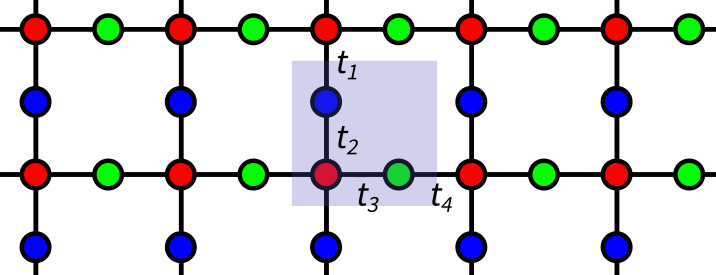

In [33]:
def interactive_band_lieb(t1,t2,t3,t4):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.33,0.66]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: lieb_2d(k,t1,t2,t3,t4)
    band(nkl,kpoints,ham1)
def lieb_2d(kd,t1,t2,t3,t4):
    ham=np.zeros((3,3))+0.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][1]=t3+t4*np.exp(-k1*1.j)
    ham[0][2]=t2+t1*np.exp(-k2*1.j)
    ham[1][0]=t3+t4*np.exp(k1*1.j)
    ham[1][1]=0.0
    ham[1][2]=0.0
    ham[2][0]=t2+t1*np.exp(k2*1.j)
    ham[2][1]=0.0
    ham[2][2]=0.0
    return(ham)
interactive(interactive_band_lieb, t1=(1.,4.), t2=(1., 4.),t3=(1.,4.),t4=(1.,4.))

interactive(children=(FloatSlider(value=2.5, description='t1', max=4.0, min=1.0), FloatSlider(value=2.5, descr…

- fix hoppings + 2d surface 